In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取 CSV 檔案
df = pd.read_csv('../lstm_features_with_labels_2317.csv')

# 刪除欄位 'B'
df.drop(['2317_trend','2317_trend_label'], axis=1, inplace=True)


print(df.head())



   start_date  feature_0  feature_1  feature_2  feature_3  feature_4  \
0  2010-10-28  -0.287270   0.010672  -0.258696   0.024531  -0.056594   
1  2010-10-29  -0.291187   0.010613  -0.262115   0.024782  -0.057022   
2  2010-11-01  -0.292907   0.010888  -0.262989   0.025041  -0.057051   
3  2010-11-02  -0.292882   0.010516  -0.263454   0.024849  -0.056962   
4  2010-11-03  -0.291751   0.010786  -0.262103   0.024915  -0.056786   

   feature_5  feature_6  feature_7  feature_8  ...  feature_54  feature_55  \
0   0.212320   0.378184  -0.071259  -0.206634  ...    0.330319    0.194293   
1   0.213167   0.382407  -0.071509  -0.208757  ...    0.333410    0.197528   
2   0.212499   0.383727  -0.071147  -0.209076  ...    0.334107    0.198975   
3   0.213341   0.383525  -0.071003  -0.209573  ...    0.334382    0.198567   
4   0.212617   0.382104  -0.070682  -0.208451  ...    0.333159    0.197663   

   feature_56  feature_57  feature_58  feature_59  feature_60  feature_61  \
0    0.058022   -0.00

分類報告：
              precision    recall  f1-score   support

        橫盤整理       0.95      0.97      0.96       329
        溫和上漲       0.98      0.96      0.97       308
        溫和下跌       0.87      0.87      0.87        23

    accuracy                           0.96       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.96      0.96      0.96       660



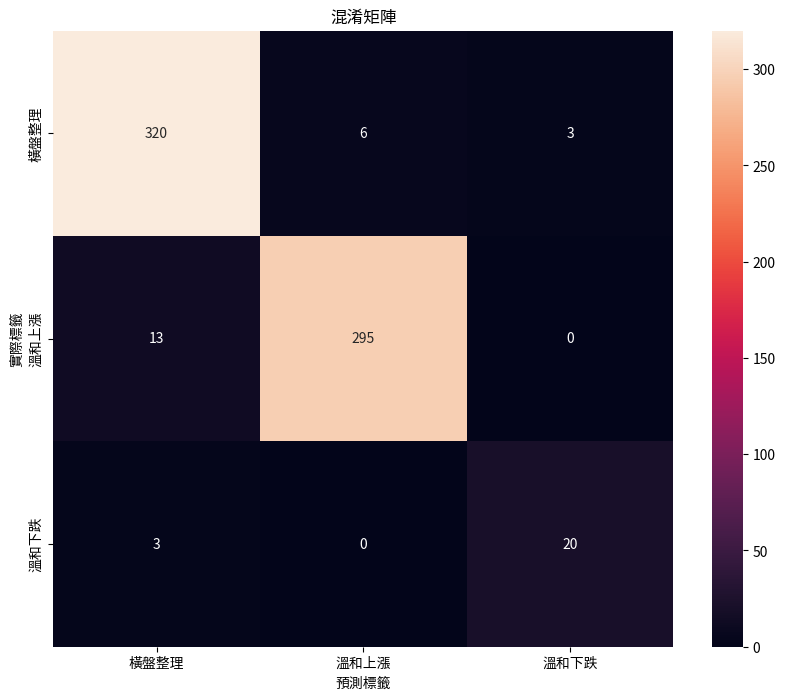

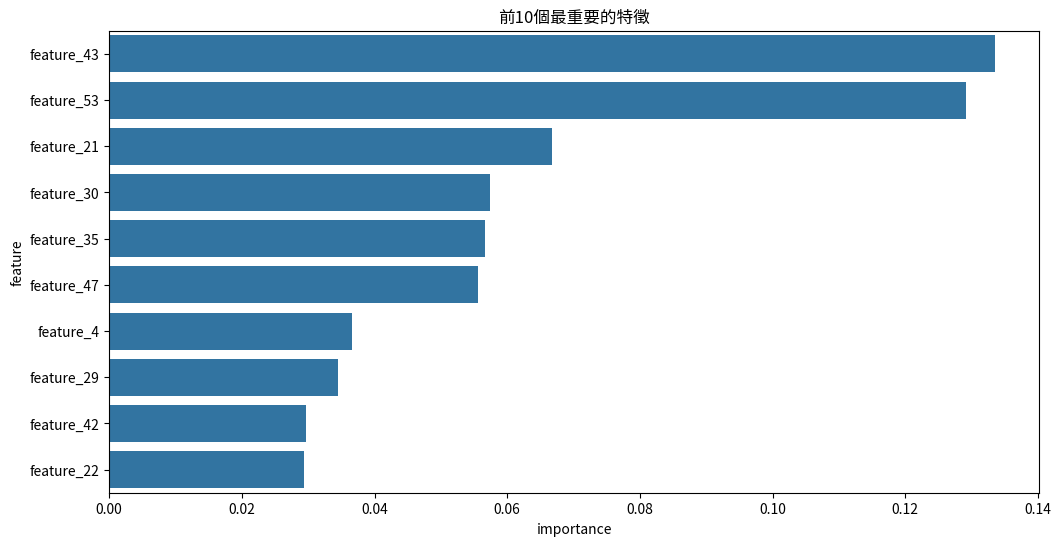

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 字體設置
font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['font.family'] = font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 讀取資料
df = pd.read_csv('lstm_features_with_labels_2317.csv')

# 準備特徵(X)和標籤(y)
X = df.filter(like='feature_')  # 選擇所有feature列
y = df['2317_trend_label']

# 將標籤轉換為數值
le = LabelEncoder()
y = le.fit_transform(y)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立和訓練模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 印出分類報告
print("分類報告：")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 繪製混淆矩陣
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('混淆矩陣')
plt.ylabel('實際標籤')
plt.xlabel('預測標籤')
plt.show()

# 特徵重要性分析
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('前10個最重要的特徵')
plt.show()

分類報告：
              precision    recall  f1-score   support

        強勢上漲       1.00      1.00      1.00       508
        橫盤整理       1.00      1.00      1.00         7
        溫和上漲       0.99      1.00      1.00       147

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



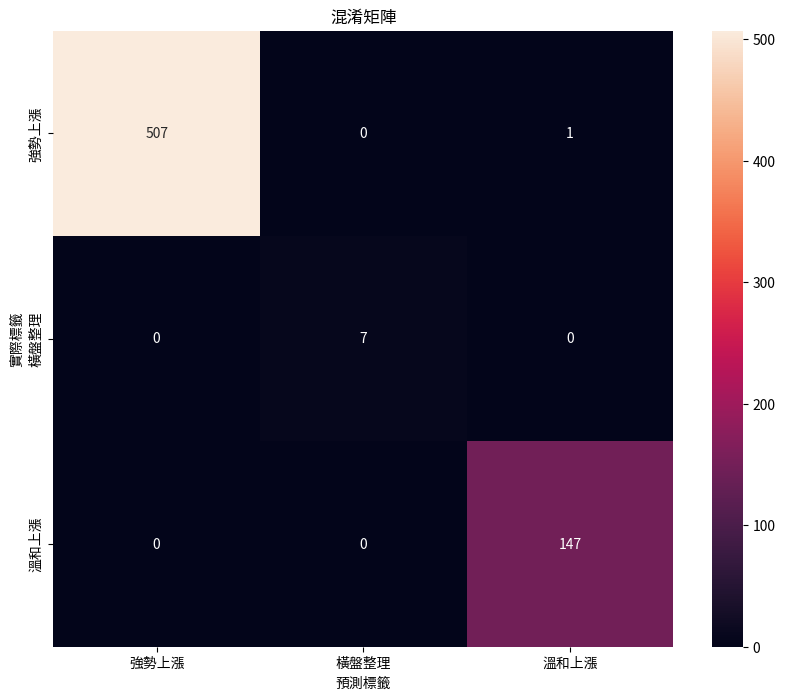

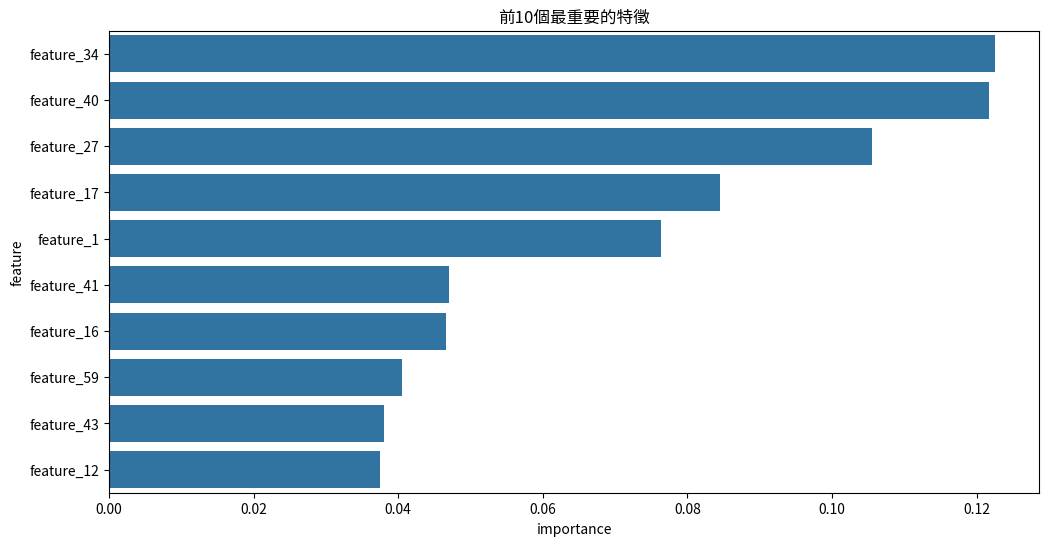

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 字體設置
font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['font.family'] = font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 讀取資料
df = pd.read_csv('lstm_features_with_labels_2330.csv')
df = df[df["2330_trend_label"] != "強勢下跌"]
# 準備特徵(X)和標籤(y)
X = df.filter(like='feature_')  # 選擇所有feature列
y = df['2330_trend_label']

# 將標籤轉換為數值
le = LabelEncoder()
y = le.fit_transform(y)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立和訓練模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 印出分類報告
print("分類報告：")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 繪製混淆矩陣
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('混淆矩陣')
plt.ylabel('實際標籤')
plt.xlabel('預測標籤')
plt.show()

# 特徵重要性分析
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('前10個最重要的特徵')
plt.show()

分類報告：
              precision    recall  f1-score   support

        橫盤整理       0.94      0.93      0.94       290
        溫和上漲       0.96      0.95      0.96       219
        溫和下跌       0.89      0.93      0.91        84

    accuracy                           0.94       593
   macro avg       0.93      0.94      0.93       593
weighted avg       0.94      0.94      0.94       593



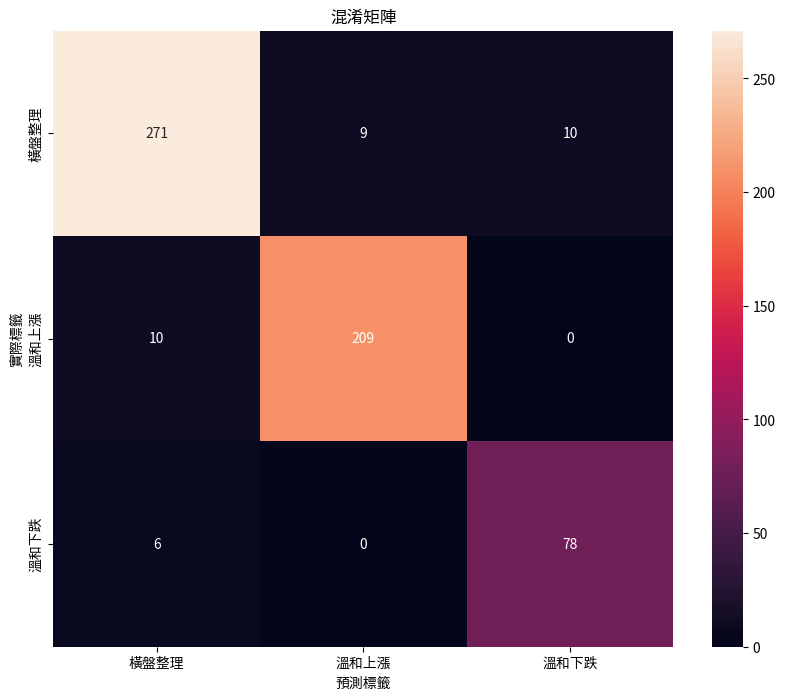

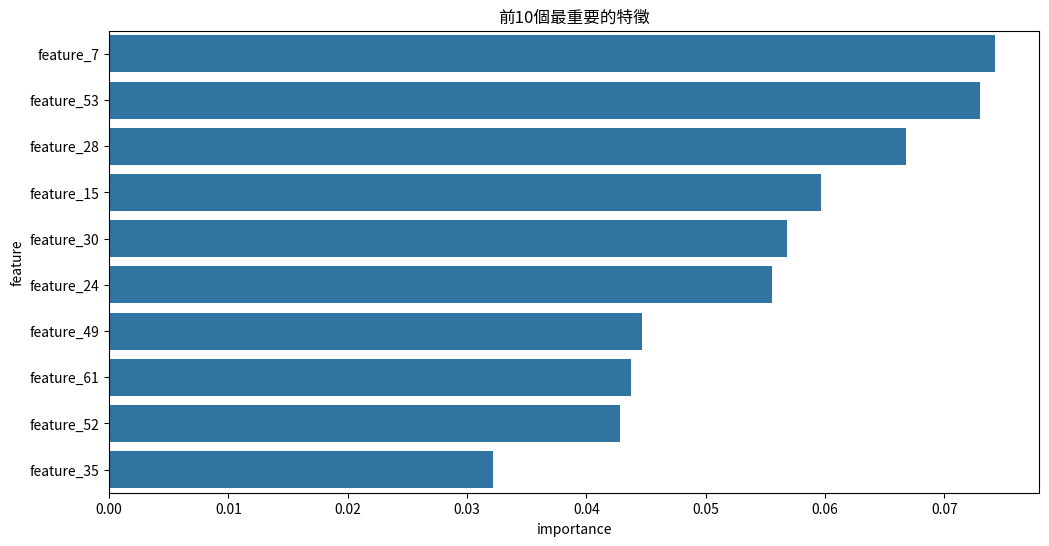

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 字體設置
font = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['font.family'] = font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 讀取資料
df = pd.read_csv('lstm_features_with_labels_2454.csv')
# 刪除 "2454_trend_label" 欄位中值為 "強勢上漲" 的資料
df = df[df["2454_trend_label"] != "強勢上漲"]


# 準備特徵(X)和標籤(y)
X = df.filter(like='feature_')  # 選擇所有feature列
y = df['2454_trend_label']

# 將標籤轉換為數值
le = LabelEncoder()
y = le.fit_transform(y)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立和訓練模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 印出分類報告
print("分類報告：")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 繪製混淆矩陣
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('混淆矩陣')
plt.ylabel('實際標籤')
plt.xlabel('預測標籤')
plt.show()

# 特徵重要性分析
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('前10個最重要的特徵')
plt.show()

使用autoencoder分更多種的市場狀態出來  (不再使用csv裡面給的label)

Epoch [10/100], Loss: 0.112559
Epoch [20/100], Loss: 0.109640
Epoch [30/100], Loss: 0.109039
Epoch [40/100], Loss: 0.108885
Epoch [50/100], Loss: 0.119829
Epoch [60/100], Loss: 0.107993
Epoch [70/100], Loss: 0.108511
Epoch [80/100], Loss: 0.107811
Epoch [90/100], Loss: 0.107915
Epoch [100/100], Loss: 0.108832


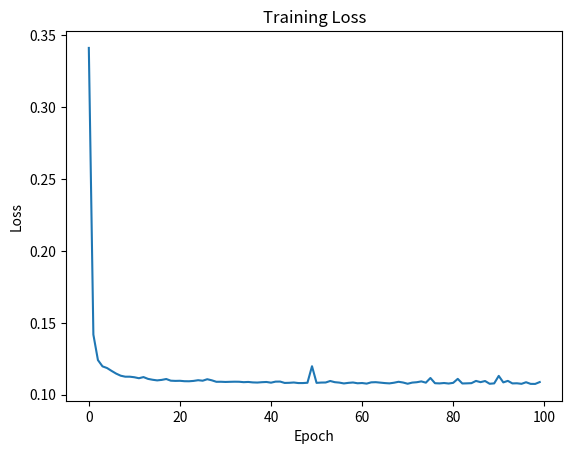

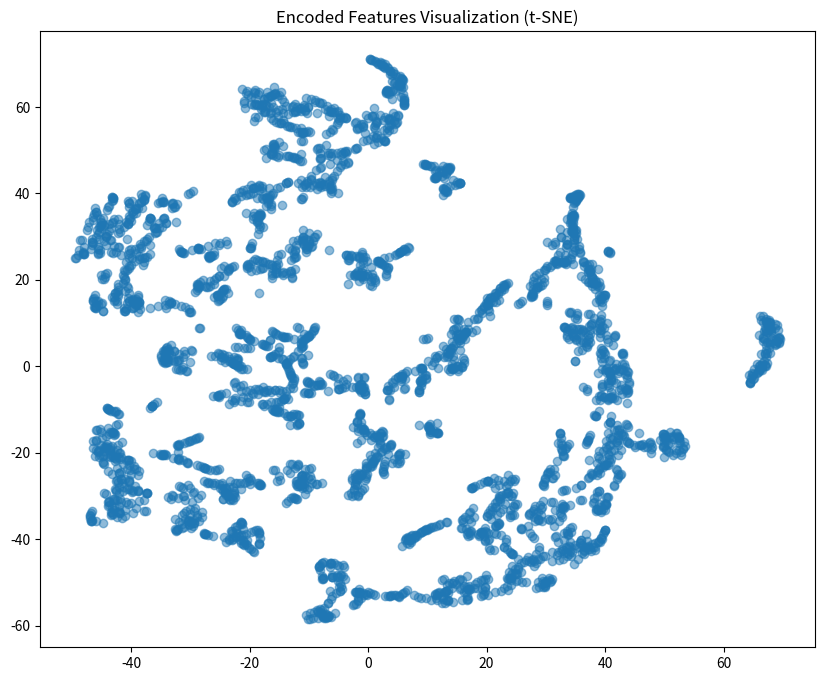

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 建立Dataset類別
class FeatureDataset(Dataset):
    def __init__(self, dataframe):
        # 只選取特徵欄位
        features = dataframe.filter(like='feature_').values
        
        # 標準化數據
        scaler = StandardScaler()
        self.features = scaler.fit_transform(features)
        self.features = torch.FloatTensor(self.features)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx]

# 定義Autoencoder模型
class Autoencoder(nn.Module):
    def __init__(self, input_dim=64, encoding_dim=32):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 48),
            nn.ReLU(),
            nn.Linear(48, encoding_dim),
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 48),
            nn.ReLU(),
            nn.Linear(48, input_dim),
            nn.Tanh()  # 使用Tanh確保輸出在[-1,1]範圍內
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# 訓練函數
def train_autoencoder(model, train_loader, num_epochs=100, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_loader:
            # 前向傳播
            output, encoded = model(batch)
            loss = criterion(output, batch)
            
            # 反向傳播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')
    
    return losses

# 主程式
def main():
    # 讀取數據
    df = pd.read_csv('lstm_features_with_labels_2317.csv')
    
    # 創建dataset和dataloader
    dataset = FeatureDataset(df)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    # 初始化模型
    model = Autoencoder(input_dim=64, encoding_dim=32)
    
    # 訓練模型
    losses = train_autoencoder(model, train_loader)
    
    # 繪製損失曲線
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    # 獲取編碼後的特徵
    model.eval()
    with torch.no_grad():
        all_encodings = []
        for batch in train_loader:
            _, encoded = model(batch)
            all_encodings.append(encoded)
        
        encoded_features = torch.cat(all_encodings, dim=0).numpy()
    
    # 使用t-SNE視覺化編碼後的特徵
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42)
    encoded_2d = tsne.fit_transform(encoded_features)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], alpha=0.5)
    plt.title('Encoded Features Visualization (t-SNE)')
    plt.show()

if __name__ == "__main__":
    main()

已載入模型：autoencoder_8d_2317.pth
K=2, Silhouette Score=0.3957
K=3, Silhouette Score=0.4933
K=4, Silhouette Score=0.4191
K=5, Silhouette Score=0.3897
K=6, Silhouette Score=0.3523
K=7, Silhouette Score=0.3690
K=8, Silhouette Score=0.3326
K=9, Silhouette Score=0.3402
K=10, Silhouette Score=0.3286

選擇最佳 K: 3（Silhouette Score: 0.4933）


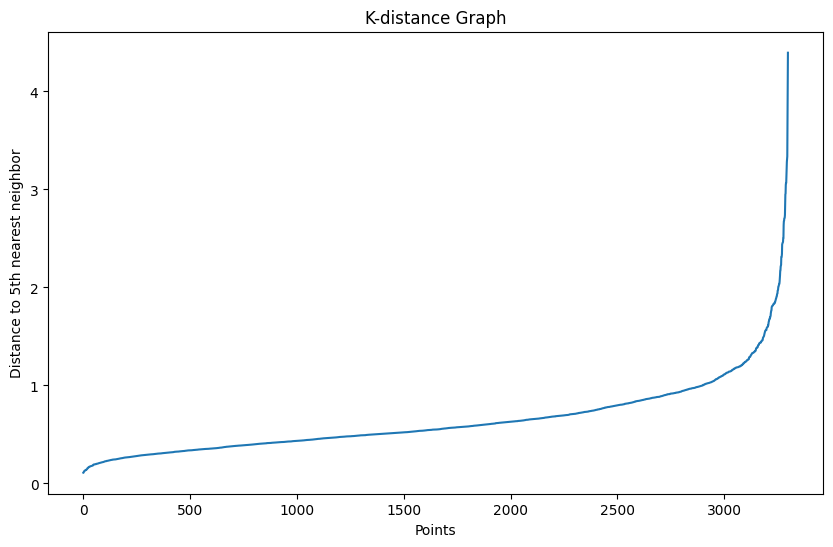

建議的eps值: 1.831


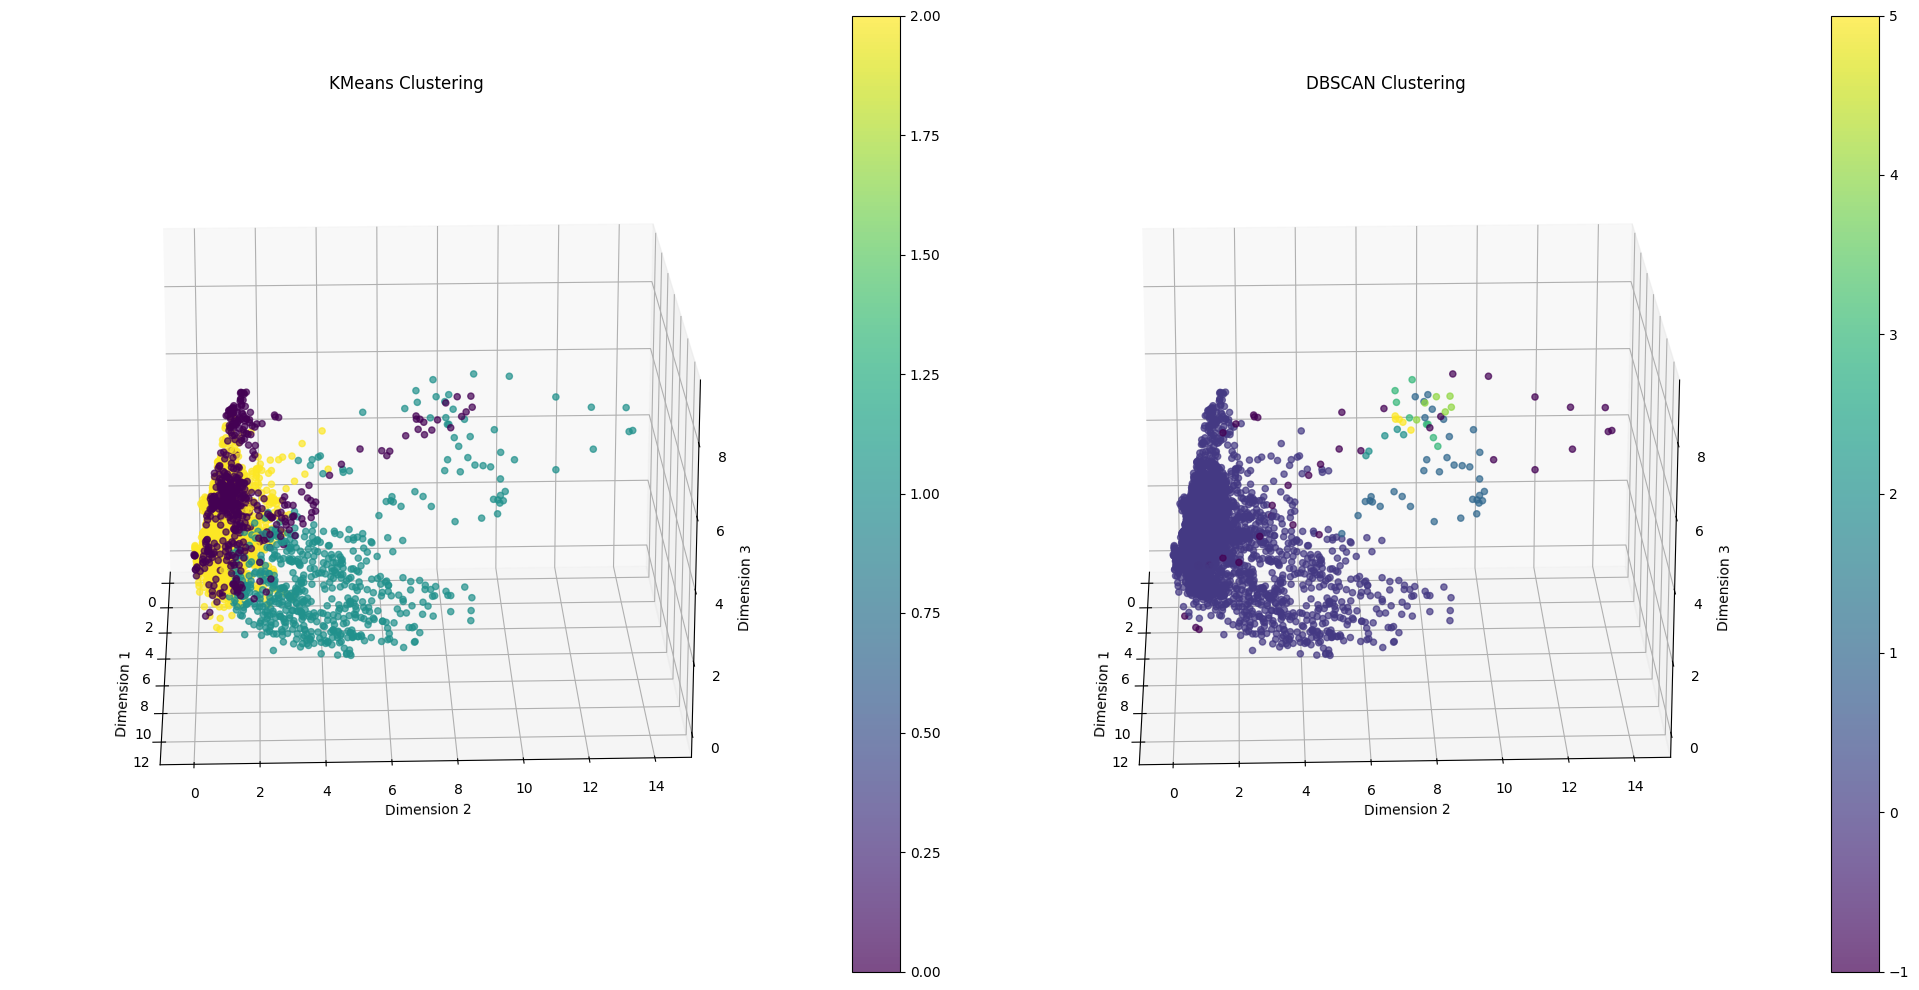


KMeans分群結果：
群集 0: 509 筆資料 (15.42%)
群集 1: 621 筆資料 (18.82%)
群集 2: 2170 筆資料 (65.76%)

DBSCAN分群結果：
雜訊點: 36 筆資料 (1.09%)
群集 0: 3204 筆資料 (97.09%)
群集 1: 36 筆資料 (1.09%)
群集 2: 5 筆資料 (0.15%)
群集 3: 8 筆資料 (0.24%)
群集 4: 6 筆資料 (0.18%)
群集 5: 5 筆資料 (0.15%)


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

def perform_dbscan_clustering(encoded_features, eps=None, min_samples=5, visualize=True):
    # 若未提供 eps，則自動尋找最佳值
    if eps is None:
        eps = find_optimal_eps(encoded_features, min_samples)

    # 執行 DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(encoded_features)

    # 降維（t-SNE）用於視覺化
    if visualize:
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42)
        reduced_data = tsne.fit_transform(encoded_features)

        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
        plt.title('DBSCAN Clustering')
        plt.xlabel('t-SNE feature 1')
        plt.ylabel('t-SNE feature 2')
        plt.colorbar(scatter)
        plt.show()

    # 輸出分群統計
    print("\nDBSCAN分群結果：")
    dbscan_sizes = pd.Series(labels).value_counts().sort_index()
    for cluster_id, size in dbscan_sizes.items():
        if cluster_id == -1:
            print(f"雜訊點: {size} 筆資料 ({size/len(labels)*100:.2f}%)")
        else:
            print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(labels)*100:.2f}%)")

    return labels
def find_optimal_k(data, k_range=range(2, 11)):
    best_k = 2
    best_score = -1
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        print(f"K={k}, Silhouette Score={score:.4f}")
        
        if score > best_score:
            best_score = score
            best_k = k

    print(f"\n選擇最佳 K: {best_k}（Silhouette Score: {best_score:.4f}）")
    return best_k

def create_rotating_animation(encoded_features, kmeans_labels, dbscan_labels, save_animation=False):
    """
    創建一個可旋轉的3D散點圖動畫
    """
    from matplotlib.animation import FuncAnimation
    
    # 創建兩個並排的3D圖
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    
    # 初始化散點圖
    scatter1 = ax1.scatter(encoded_features[:, 0], 
                          encoded_features[:, 1], 
                          encoded_features[:, 2],
                          c=kmeans_labels, cmap='viridis', alpha=0.7)
    scatter2 = ax2.scatter(encoded_features[:, 0], 
                          encoded_features[:, 1], 
                          encoded_features[:, 2],
                          c=dbscan_labels, cmap='viridis', alpha=0.7)
    
    # 設置標題和軸標籤
    ax1.set_title('KMeans Clustering')
    ax2.set_title('DBSCAN Clustering')
    for ax in [ax1, ax2]:
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.set_zlabel('Dimension 3')
    
    # 添加顏色條
    plt.colorbar(scatter1, ax=ax1)
    plt.colorbar(scatter2, ax=ax2)
    
    # 定義更新函數
    def update(frame):
        # 每幀旋轉視角
        ax1.view_init(elev=20, azim=frame)
        ax2.view_init(elev=20, azim=frame)
        return scatter1, scatter2

    # 創建動畫
    anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), 
                        interval=50, blit=True)
    
    if save_animation:
        # 保存動畫為 GIF
        anim.save('clustering_animation_2317.gif', writer='pillow')
    
    plt.tight_layout()
    plt.show()


# 建立Dataset類別
class FeatureDataset(Dataset):
    def __init__(self, dataframe):
        # 只選取特徵欄位
        features = dataframe.filter(like='feature_').values
        
        # 標準化數據
        scaler = StandardScaler()
        self.features = scaler.fit_transform(features)
        self.features = torch.FloatTensor(self.features)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx]

# 定義Autoencoder模型
class Autoencoder(nn.Module):
    def __init__(self, input_dim=64, encoding_dim=8):  # encoding_dim=8
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 48),
            nn.ReLU(),
            nn.Linear(48, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 48),
            nn.ReLU(),
            nn.Linear(48, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# 訓練函數
def train_autoencoder(model, train_loader, num_epochs=100, learning_rate=0.001, save_path="autoencoder.pth"):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_loader:
            output, encoded = model(batch)
            loss = criterion(output, batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')
    
    # 儲存模型
    torch.save(model.state_dict(), save_path)
    print(f"模型已儲存到 {save_path}")
    
    return losses



def find_optimal_eps(data, min_samples=5):
    """
    使用K-distance圖找出最佳的eps值
    """
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=min_samples)
    neigh.fit(data)
    distances, indices = neigh.kneighbors(data)
    distances = np.sort(distances[:, -1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(distances)), distances)
    plt.title('K-distance Graph')
    plt.xlabel('Points')
    plt.ylabel(f'Distance to {min_samples}th nearest neighbor')
    plt.show()
    
    # 找出曲線轉折點
    from kneed import KneeLocator
    knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    eps = distances[knee.elbow]
    print(f"建議的eps值: {eps:.3f}")
    return eps

def main():
    df = pd.read_csv('../lstm_features_with_labels_2317.csv')
    dataset = FeatureDataset(df)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

    # 使用5維編碼
    model = Autoencoder(input_dim=64, encoding_dim=8)
    model_path = "autoencoder_8d_2317.pth"

    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        model.eval()
        print(f"已載入模型：{model_path}")
    else:
        losses = train_autoencoder(model, train_loader, save_path=model_path)
        plt.figure(figsize=(10, 6))
        plt.plot(losses)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    # 獲取特徵
    model.eval()
    with torch.no_grad():
        all_encodings = []
        for batch in train_loader:
            _, encoded = model(batch)
            all_encodings.append(encoded)
        encoded_features = torch.cat(all_encodings, dim=0).numpy()

    # 執行分群
    optimal_k = find_optimal_k(encoded_features)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans_labels = kmeans.fit_predict(encoded_features)

    eps = find_optimal_eps(encoded_features, min_samples=5)
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(encoded_features)

    # 創建動態視覺化
    create_rotating_animation(encoded_features, kmeans_labels, dbscan_labels, save_animation=True)

    # 顯示分群統計
    print("\nKMeans分群結果：")
    for cluster_id, size in pd.Series(kmeans_labels).value_counts().sort_index().items():
        print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(kmeans_labels)*100:.2f}%)")

    print("\nDBSCAN分群結果：")
    for cluster_id, size in pd.Series(dbscan_labels).value_counts().sort_index().items():
        if cluster_id == -1:
            print(f"雜訊點: {size} 筆資料 ({size/len(dbscan_labels)*100:.2f}%)")
        else:
            print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(dbscan_labels)*100:.2f}%)")

if __name__ == "__main__":
    main()

改使用KNN找相鄰的點

In [6]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# 定義Autoencoder模型
class Autoencoder(torch.nn.Module):
    def __init__(self, input_dim=64, encoding_dim=8):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 48),
            torch.nn.ReLU(),
            torch.nn.Linear(48, encoding_dim),
            torch.nn.ReLU()
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(encoding_dim, 48),
            torch.nn.ReLU(),
            torch.nn.Linear(48, input_dim),
            torch.nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

def find_similar_patterns():
    # 載入資料
    df = pd.read_csv('../lstm_features_with_labels_2317.csv')
    features = df.filter(like='feature_').values
    
    # 標準化數據
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # 載入模型
    model = Autoencoder(input_dim=64, encoding_dim=8)
    model.load_state_dict(torch.load('autoencoder_8d_2317.pth'))
    model.eval()
    
    # 將所有資料轉換到編碼空間
    with torch.no_grad():
        all_data = torch.FloatTensor(features_scaled)
        _, all_encoded = model(all_data)
        all_encoded = all_encoded.numpy()
    
    # 選擇一筆資料(這裡選擇第一筆，你可以改變索引來選擇不同的資料)
    target_index = 0
    target_encoded = all_encoded[target_index]
    
    # 使用KNN找最相近的點
    k = 5  # 要找最相近的5個點
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(all_encoded)  # k+1 因為會包含自己
    distances, indices = nbrs.kneighbors([target_encoded])
    
    # 顯示結果
    print(f"\n目標資料的index: {target_index}")
    print("\n最相近的點:")
    print("Index    Distance")
    print("-" * 20)
    for i, (idx, dist) in enumerate(zip(indices[0][1:], distances[0][1:])):  # 從1開始以跳過自己
        print(f"{idx:<8} {dist:.6f}")
        
        # 如果原始資料有日期欄位，也可以顯示日期
        if 'date' in df.columns:
            print(f"Date: {df.iloc[idx]['date']}")
        print()

if __name__ == "__main__":
    find_similar_patterns()


目標資料的index: 0

最相近的點:
Index    Distance
--------------------
6        0.425627

8        0.479156

7        0.516751

10       0.521422

9        0.522528



2330的部分

Epoch [10/100], Loss: 0.112577
Epoch [20/100], Loss: 0.109697
Epoch [30/100], Loss: 0.110795
Epoch [40/100], Loss: 0.109885
Epoch [50/100], Loss: 0.109082
Epoch [60/100], Loss: 0.108286
Epoch [70/100], Loss: 0.108612
Epoch [80/100], Loss: 0.108999
Epoch [90/100], Loss: 0.109329
Epoch [100/100], Loss: 0.108082
模型已儲存到 autoencoder_8d_2330.pth


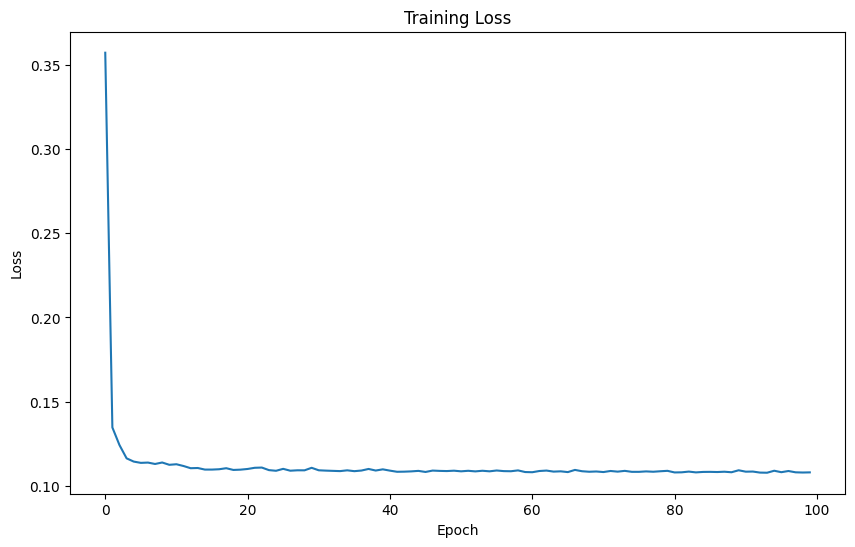

K=2, Silhouette Score=0.6488
K=3, Silhouette Score=0.4464
K=4, Silhouette Score=0.4234
K=5, Silhouette Score=0.3955
K=6, Silhouette Score=0.4158
K=7, Silhouette Score=0.4227
K=8, Silhouette Score=0.4054
K=9, Silhouette Score=0.3383
K=10, Silhouette Score=0.3634

選擇最佳 K: 2（Silhouette Score: 0.6488）


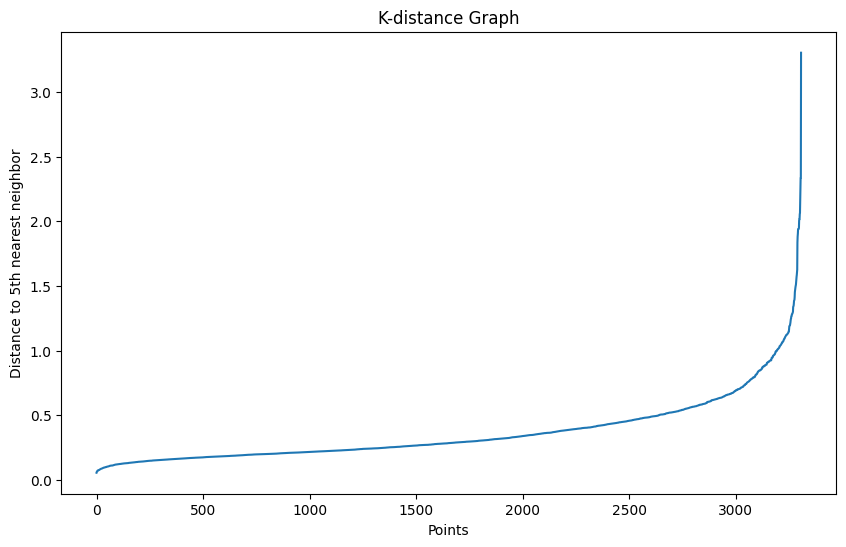

建議的eps值: 1.122


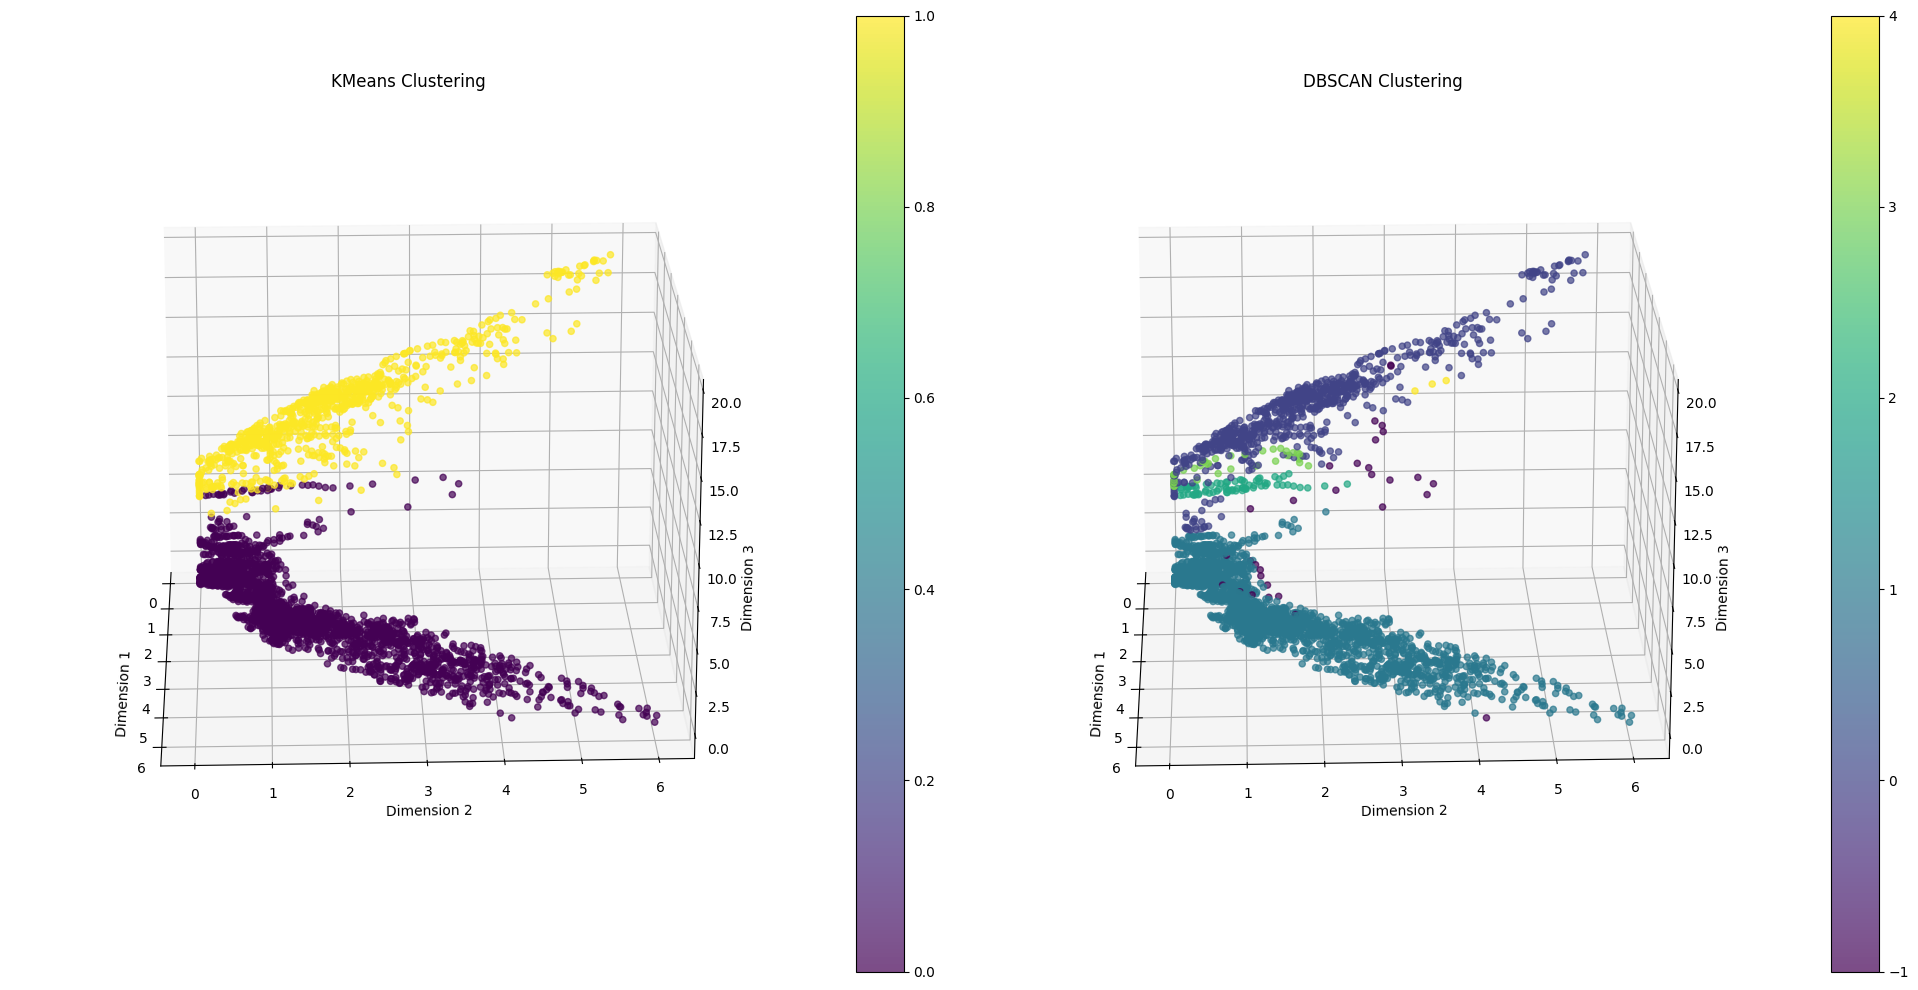


KMeans分群結果：
群集 0: 2456 筆資料 (74.27%)
群集 1: 851 筆資料 (25.73%)

DBSCAN分群結果：
雜訊點: 31 筆資料 (0.94%)
群集 0: 777 筆資料 (23.50%)
群集 1: 2384 筆資料 (72.09%)
群集 2: 73 筆資料 (2.21%)
群集 3: 39 筆資料 (1.18%)
群集 4: 3 筆資料 (0.09%)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

def perform_dbscan_clustering(encoded_features, eps=None, min_samples=5, visualize=True):
    # 若未提供 eps，則自動尋找最佳值
    if eps is None:
        eps = find_optimal_eps(encoded_features, min_samples)

    # 執行 DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(encoded_features)

    # 降維（t-SNE）用於視覺化
    if visualize:
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42)
        reduced_data = tsne.fit_transform(encoded_features)

        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
        plt.title('DBSCAN Clustering')
        plt.xlabel('t-SNE feature 1')
        plt.ylabel('t-SNE feature 2')
        plt.colorbar(scatter)
        plt.show()

    # 輸出分群統計
    print("\nDBSCAN分群結果：")
    dbscan_sizes = pd.Series(labels).value_counts().sort_index()
    for cluster_id, size in dbscan_sizes.items():
        if cluster_id == -1:
            print(f"雜訊點: {size} 筆資料 ({size/len(labels)*100:.2f}%)")
        else:
            print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(labels)*100:.2f}%)")

    return labels
def find_optimal_k(data, k_range=range(2, 11)):
    best_k = 2
    best_score = -1
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        print(f"K={k}, Silhouette Score={score:.4f}")
        
        if score > best_score:
            best_score = score
            best_k = k

    print(f"\n選擇最佳 K: {best_k}（Silhouette Score: {best_score:.4f}）")
    return best_k

def create_rotating_animation(encoded_features, kmeans_labels, dbscan_labels, save_animation=False):
    """
    創建一個可旋轉的3D散點圖動畫
    """
    from matplotlib.animation import FuncAnimation
    
    # 創建兩個並排的3D圖
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    
    # 初始化散點圖
    scatter1 = ax1.scatter(encoded_features[:, 0], 
                          encoded_features[:, 1], 
                          encoded_features[:, 2],
                          c=kmeans_labels, cmap='viridis', alpha=0.7)
    scatter2 = ax2.scatter(encoded_features[:, 0], 
                          encoded_features[:, 1], 
                          encoded_features[:, 2],
                          c=dbscan_labels, cmap='viridis', alpha=0.7)
    
    # 設置標題和軸標籤
    ax1.set_title('KMeans Clustering')
    ax2.set_title('DBSCAN Clustering')
    for ax in [ax1, ax2]:
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.set_zlabel('Dimension 3')
    
    # 添加顏色條
    plt.colorbar(scatter1, ax=ax1)
    plt.colorbar(scatter2, ax=ax2)
    
    # 定義更新函數
    def update(frame):
        # 每幀旋轉視角
        ax1.view_init(elev=20, azim=frame)
        ax2.view_init(elev=20, azim=frame)
        return scatter1, scatter2

    # 創建動畫
    anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), 
                        interval=50, blit=True)
    
    if save_animation:
        # 保存動畫為 GIF
        anim.save('clustering_animation2330.gif', writer='pillow')
    
    plt.tight_layout()
    plt.show()


# 建立Dataset類別
class FeatureDataset(Dataset):
    def __init__(self, dataframe):
        # 只選取特徵欄位
        features = dataframe.filter(like='feature_').values
        
        # 標準化數據
        scaler = StandardScaler()
        self.features = scaler.fit_transform(features)
        self.features = torch.FloatTensor(self.features)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx]

# 定義Autoencoder模型
class Autoencoder(nn.Module):
    def __init__(self, input_dim=64, encoding_dim=8):  # encoding_dim=8
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 48),
            nn.ReLU(),
            nn.Linear(48, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 48),
            nn.ReLU(),
            nn.Linear(48, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# 訓練函數
def train_autoencoder(model, train_loader, num_epochs=100, learning_rate=0.001, save_path="autoencoder.pth"):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_loader:
            output, encoded = model(batch)
            loss = criterion(output, batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')
    
    # 儲存模型
    torch.save(model.state_dict(), save_path)
    print(f"模型已儲存到 {save_path}")
    
    return losses



def find_optimal_eps(data, min_samples=5):
    """
    使用K-distance圖找出最佳的eps值
    """
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=min_samples)
    neigh.fit(data)
    distances, indices = neigh.kneighbors(data)
    distances = np.sort(distances[:, -1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(distances)), distances)
    plt.title('K-distance Graph')
    plt.xlabel('Points')
    plt.ylabel(f'Distance to {min_samples}th nearest neighbor')
    plt.show()
    
    # 找出曲線轉折點
    from kneed import KneeLocator
    knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    eps = distances[knee.elbow]
    print(f"建議的eps值: {eps:.3f}")
    return eps

def main():
    
    df = pd.read_csv('../lstm_features_with_labels_2330.csv')
    dataset = FeatureDataset(df)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

    # 使用5維編碼
    model = Autoencoder(input_dim=64, encoding_dim=8)
    model_path = "autoencoder_8d_2330.pth"

    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        model.eval()
        print(f"已載入模型：{model_path}")
    else:
        losses = train_autoencoder(model, train_loader, save_path=model_path)
        plt.figure(figsize=(10, 6))
        plt.plot(losses)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    # 獲取特徵
    model.eval()
    with torch.no_grad():
        all_encodings = []
        for batch in train_loader:
            _, encoded = model(batch)
            all_encodings.append(encoded)
        encoded_features = torch.cat(all_encodings, dim=0).numpy()

    # 執行分群
    optimal_k = find_optimal_k(encoded_features)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans_labels = kmeans.fit_predict(encoded_features)

    eps = find_optimal_eps(encoded_features, min_samples=5)
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(encoded_features)

    # 創建動態視覺化
    create_rotating_animation(encoded_features, kmeans_labels, dbscan_labels, save_animation=True)

    # 顯示分群統計
    print("\nKMeans分群結果：")
    for cluster_id, size in pd.Series(kmeans_labels).value_counts().sort_index().items():
        print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(kmeans_labels)*100:.2f}%)")

    print("\nDBSCAN分群結果：")
    for cluster_id, size in pd.Series(dbscan_labels).value_counts().sort_index().items():
        if cluster_id == -1:
            print(f"雜訊點: {size} 筆資料 ({size/len(dbscan_labels)*100:.2f}%)")
        else:
            print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(dbscan_labels)*100:.2f}%)")

if __name__ == "__main__":
    main()

In [7]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# 定義Autoencoder模型
class Autoencoder(torch.nn.Module):
    def __init__(self, input_dim=64, encoding_dim=8):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 48),
            torch.nn.ReLU(),
            torch.nn.Linear(48, encoding_dim),
            torch.nn.ReLU()
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(encoding_dim, 48),
            torch.nn.ReLU(),
            torch.nn.Linear(48, input_dim),
            torch.nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

def find_similar_patterns():
    # 載入資料
    df = pd.read_csv('../lstm_features_with_labels_2330.csv')
    features = df.filter(like='feature_').values
    
    # 標準化數據
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # 載入模型
    model = Autoencoder(input_dim=64, encoding_dim=8)
    model.load_state_dict(torch.load('autoencoder_8d_2330.pth'))
    model.eval()
    
    # 將所有資料轉換到編碼空間
    with torch.no_grad():
        all_data = torch.FloatTensor(features_scaled)
        _, all_encoded = model(all_data)
        all_encoded = all_encoded.numpy()
    
    # 選擇一筆資料(這裡選擇第一筆，你可以改變索引來選擇不同的資料)
    target_index = 0
    target_encoded = all_encoded[target_index]
    
    # 使用KNN找最相近的點
    k = 5  # 要找最相近的5個點
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(all_encoded)  # k+1 因為會包含自己
    distances, indices = nbrs.kneighbors([target_encoded])
    
    # 顯示結果
    print(f"\n目標資料的index: {target_index}")
    print("\n最相近的點:")
    print("Index    Distance")
    print("-" * 20)
    for i, (idx, dist) in enumerate(zip(indices[0][1:], distances[0][1:])):  # 從1開始以跳過自己
        print(f"{idx:<8} {dist:.6f}")
        
        # 如果原始資料有日期欄位，也可以顯示日期
        if 'date' in df.columns:
            print(f"Date: {df.iloc[idx]['date']}")
        print()

if __name__ == "__main__":
    find_similar_patterns()


目標資料的index: 0

最相近的點:
Index    Distance
--------------------
14       0.148379

17       0.159970

23       0.333969

18       0.364859

11       0.424192



2454的部分

Epoch [10/100], Loss: 0.174440
Epoch [20/100], Loss: 0.169569
Epoch [30/100], Loss: 0.171344
Epoch [40/100], Loss: 0.167202
Epoch [50/100], Loss: 0.168524


Epoch [60/100], Loss: 0.166611
Epoch [70/100], Loss: 0.169093
Epoch [80/100], Loss: 0.166710
Epoch [90/100], Loss: 0.167487
Epoch [100/100], Loss: 0.166361
模型已儲存到 autoencoder_8d_2454.pth


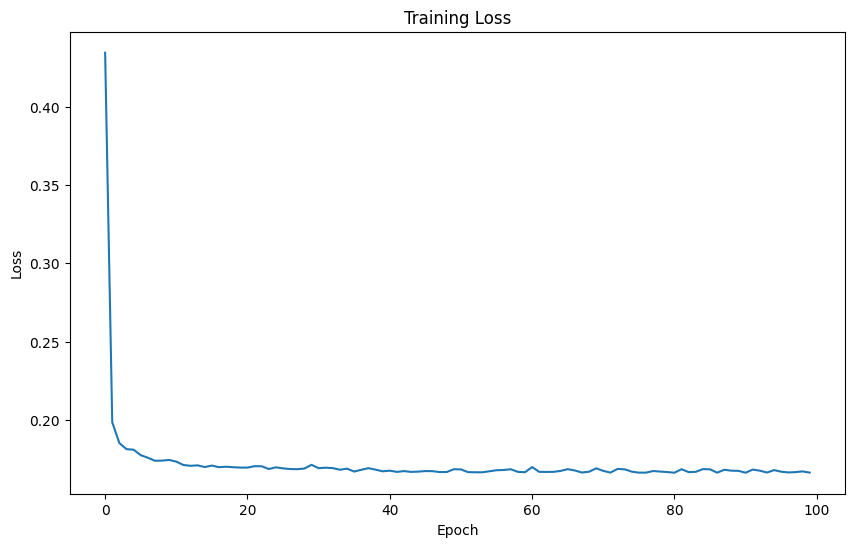

K=2, Silhouette Score=0.8265
K=3, Silhouette Score=0.6760
K=4, Silhouette Score=0.6615
K=5, Silhouette Score=0.6414
K=6, Silhouette Score=0.4055
K=7, Silhouette Score=0.3964
K=8, Silhouette Score=0.3874
K=9, Silhouette Score=0.2974
K=10, Silhouette Score=0.2891

選擇最佳 K: 2（Silhouette Score: 0.8265）


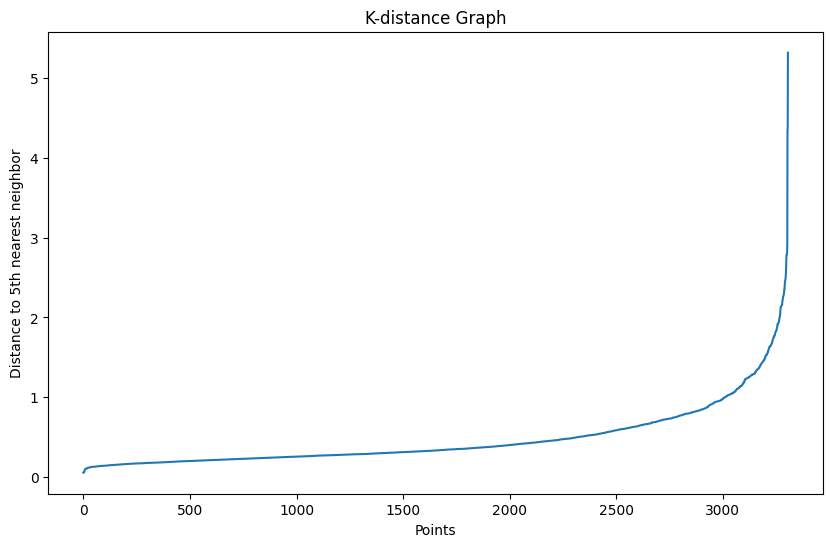

建議的eps值: 1.530


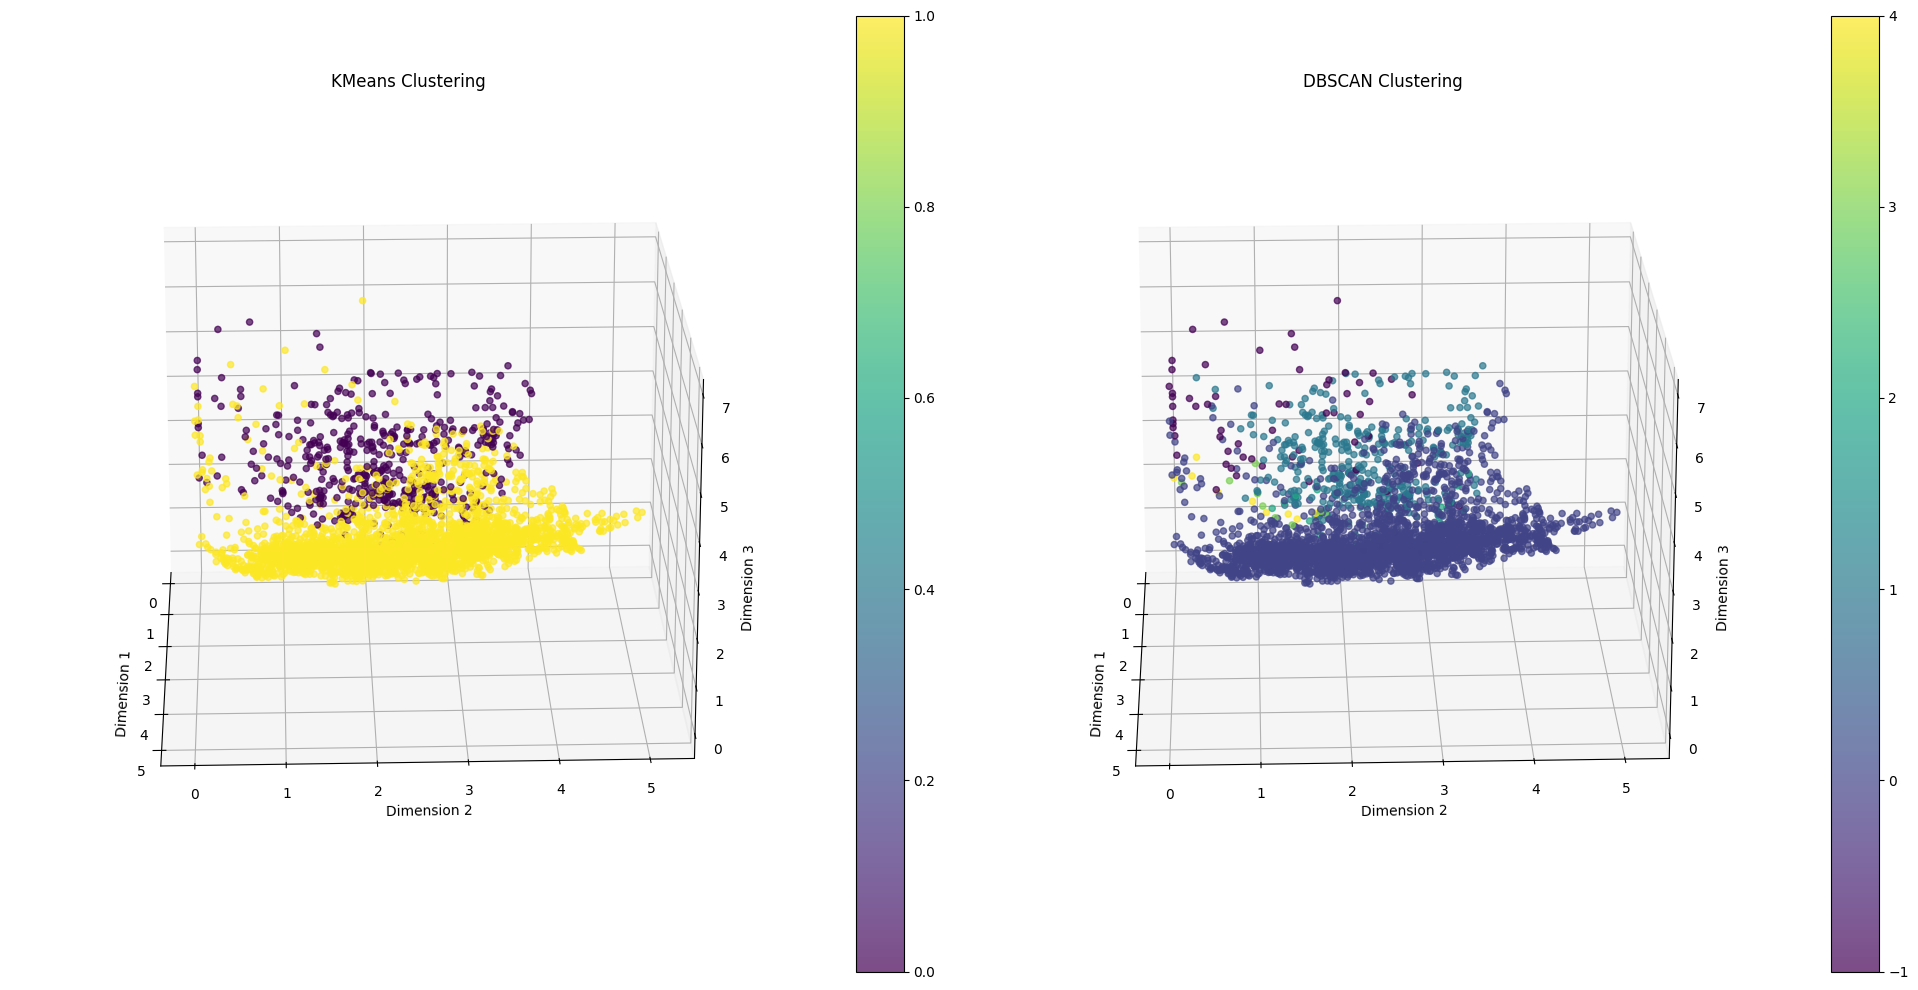


KMeans分群結果：
群集 0: 478 筆資料 (14.46%)
群集 1: 2828 筆資料 (85.54%)

DBSCAN分群結果：
雜訊點: 58 筆資料 (1.75%)
群集 0: 2841 筆資料 (85.93%)
群集 1: 353 筆資料 (10.68%)
群集 2: 35 筆資料 (1.06%)
群集 3: 10 筆資料 (0.30%)
群集 4: 9 筆資料 (0.27%)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

def perform_dbscan_clustering(encoded_features, eps=None, min_samples=5, visualize=True):
    # 若未提供 eps，則自動尋找最佳值
    if eps is None:
        eps = find_optimal_eps(encoded_features, min_samples)

    # 執行 DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(encoded_features)

    # 降維（t-SNE）用於視覺化
    if visualize:
        from sklearn.manifold import TSNE
        tsne = TSNE(n_components=2, random_state=42)
        reduced_data = tsne.fit_transform(encoded_features)

        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
        plt.title('DBSCAN Clustering')
        plt.xlabel('t-SNE feature 1')
        plt.ylabel('t-SNE feature 2')
        plt.colorbar(scatter)
        plt.show()

    # 輸出分群統計
    print("\nDBSCAN分群結果：")
    dbscan_sizes = pd.Series(labels).value_counts().sort_index()
    for cluster_id, size in dbscan_sizes.items():
        if cluster_id == -1:
            print(f"雜訊點: {size} 筆資料 ({size/len(labels)*100:.2f}%)")
        else:
            print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(labels)*100:.2f}%)")

    return labels
def find_optimal_k(data, k_range=range(2, 11)):
    best_k = 2
    best_score = -1
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        print(f"K={k}, Silhouette Score={score:.4f}")
        
        if score > best_score:
            best_score = score
            best_k = k

    print(f"\n選擇最佳 K: {best_k}（Silhouette Score: {best_score:.4f}）")
    return best_k

def create_rotating_animation(encoded_features, kmeans_labels, dbscan_labels, save_animation=False):
    """
    創建一個可旋轉的3D散點圖動畫
    """
    from matplotlib.animation import FuncAnimation
    
    # 創建兩個並排的3D圖
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    
    # 初始化散點圖
    scatter1 = ax1.scatter(encoded_features[:, 0], 
                          encoded_features[:, 1], 
                          encoded_features[:, 2],
                          c=kmeans_labels, cmap='viridis', alpha=0.7)
    scatter2 = ax2.scatter(encoded_features[:, 0], 
                          encoded_features[:, 1], 
                          encoded_features[:, 2],
                          c=dbscan_labels, cmap='viridis', alpha=0.7)
    
    # 設置標題和軸標籤
    ax1.set_title('KMeans Clustering')
    ax2.set_title('DBSCAN Clustering')
    for ax in [ax1, ax2]:
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.set_zlabel('Dimension 3')
    
    # 添加顏色條
    plt.colorbar(scatter1, ax=ax1)
    plt.colorbar(scatter2, ax=ax2)
    
    # 定義更新函數
    def update(frame):
        # 每幀旋轉視角
        ax1.view_init(elev=20, azim=frame)
        ax2.view_init(elev=20, azim=frame)
        return scatter1, scatter2

    # 創建動畫
    anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), 
                        interval=50, blit=True)
    
    if save_animation:
        # 保存動畫為 GIF
        anim.save('clustering_animation2454.gif', writer='pillow')
    
    plt.tight_layout()
    plt.show()


# 建立Dataset類別
class FeatureDataset(Dataset):
    def __init__(self, dataframe):
        # 只選取特徵欄位
        features = dataframe.filter(like='feature_').values
        
        # 標準化數據
        scaler = StandardScaler()
        self.features = scaler.fit_transform(features)
        self.features = torch.FloatTensor(self.features)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx]

# 定義Autoencoder模型
class Autoencoder(nn.Module):
    def __init__(self, input_dim=64, encoding_dim=8):  # encoding_dim=8
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 48),
            nn.ReLU(),
            nn.Linear(48, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 48),
            nn.ReLU(),
            nn.Linear(48, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# 訓練函數
def train_autoencoder(model, train_loader, num_epochs=100, learning_rate=0.001, save_path="autoencoder.pth"):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_loader:
            output, encoded = model(batch)
            loss = criterion(output, batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')
    
    # 儲存模型
    torch.save(model.state_dict(), save_path)
    print(f"模型已儲存到 {save_path}")
    
    return losses



def find_optimal_eps(data, min_samples=5):
    """
    使用K-distance圖找出最佳的eps值
    """
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=min_samples)
    neigh.fit(data)
    distances, indices = neigh.kneighbors(data)
    distances = np.sort(distances[:, -1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(distances)), distances)
    plt.title('K-distance Graph')
    plt.xlabel('Points')
    plt.ylabel(f'Distance to {min_samples}th nearest neighbor')
    plt.show()
    
    # 找出曲線轉折點
    from kneed import KneeLocator
    knee = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    eps = distances[knee.elbow]
    print(f"建議的eps值: {eps:.3f}")
    return eps

def main():
    
    df = pd.read_csv('../lstm_features_with_labels_2454.csv')
    dataset = FeatureDataset(df)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

    # 使用5維編碼
    model = Autoencoder(input_dim=64, encoding_dim=8)
    model_path = "autoencoder_8d_2454.pth"

    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        model.eval()
        print(f"已載入模型：{model_path}")
    else:
        losses = train_autoencoder(model, train_loader, save_path=model_path)
        plt.figure(figsize=(10, 6))
        plt.plot(losses)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    # 獲取特徵
    model.eval()
    with torch.no_grad():
        all_encodings = []
        for batch in train_loader:
            _, encoded = model(batch)
            all_encodings.append(encoded)
        encoded_features = torch.cat(all_encodings, dim=0).numpy()

    # 執行分群
    optimal_k = find_optimal_k(encoded_features)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans_labels = kmeans.fit_predict(encoded_features)

    eps = find_optimal_eps(encoded_features, min_samples=5)
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(encoded_features)

    # 創建動態視覺化
    create_rotating_animation(encoded_features, kmeans_labels, dbscan_labels, save_animation=True)

    # 顯示分群統計
    print("\nKMeans分群結果：")
    for cluster_id, size in pd.Series(kmeans_labels).value_counts().sort_index().items():
        print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(kmeans_labels)*100:.2f}%)")

    print("\nDBSCAN分群結果：")
    for cluster_id, size in pd.Series(dbscan_labels).value_counts().sort_index().items():
        if cluster_id == -1:
            print(f"雜訊點: {size} 筆資料 ({size/len(dbscan_labels)*100:.2f}%)")
        else:
            print(f"群集 {cluster_id}: {size} 筆資料 ({size/len(dbscan_labels)*100:.2f}%)")

if __name__ == "__main__":
    main()

In [9]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# 定義Autoencoder模型
class Autoencoder(torch.nn.Module):
    def __init__(self, input_dim=64, encoding_dim=8):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 48),
            torch.nn.ReLU(),
            torch.nn.Linear(48, encoding_dim),
            torch.nn.ReLU()
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(encoding_dim, 48),
            torch.nn.ReLU(),
            torch.nn.Linear(48, input_dim),
            torch.nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

def find_similar_patterns():
    # 載入資料
    df = pd.read_csv('../lstm_features_with_labels_2454.csv')
    features = df.filter(like='feature_').values
    
    # 標準化數據
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # 載入模型
    model = Autoencoder(input_dim=64, encoding_dim=8)
    model.load_state_dict(torch.load('autoencoder_8d_2454.pth'))
    model.eval()
    
    # 將所有資料轉換到編碼空間
    with torch.no_grad():
        all_data = torch.FloatTensor(features_scaled)
        _, all_encoded = model(all_data)
        all_encoded = all_encoded.numpy()
    
    # 選擇一筆資料(這裡選擇第一筆，你可以改變索引來選擇不同的資料)
    target_index = 0
    target_encoded = all_encoded[target_index]
    
    # 使用KNN找最相近的點
    k = 5  # 要找最相近的5個點
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(all_encoded)  # k+1 因為會包含自己
    distances, indices = nbrs.kneighbors([target_encoded])
    
    # 顯示結果
    print(f"\n目標資料的index: {target_index}")
    print("\n最相近的點:")
    print("Index    Distance")
    print("-" * 20)
    for i, (idx, dist) in enumerate(zip(indices[0][1:], distances[0][1:])):  # 從1開始以跳過自己
        print(f"{idx:<8} {dist:.6f}")
        
        # 如果原始資料有日期欄位，也可以顯示日期
        if 'date' in df.columns:
            print(f"Date: {df.iloc[idx]['date']}")
        print()

if __name__ == "__main__":
    find_similar_patterns()


目標資料的index: 0

最相近的點:
Index    Distance
--------------------
2        0.188476

1        0.228514

12       0.447640

3        0.487859

13       0.506157

